## Desvanecimento Rayleigh

O modelo de canal com desvanecimento Rayleigh é utilizado para detecção não coerente, para sinais em RF transmitidos por canais com desvanecimento, em que o sinal recebido  pode ser representado por um processo da forma:

$$
r(t) = R\cos(2\pi f_c t + \theta (t)) \tag{1}
$$

com 

$$
\theta(t) \approx \mathrm{uniforme}(0, 2\pi) \tag{2}
$$

a função densidade de probabilidade do desvanecimento é:

$$
p_{R_m}(r_m) = 
\begin{cases} 
\frac{r_m}{\sigma^2} e^{-\frac{r_m^2}{2\sigma^2}}, & r_m > 0,\; m = 2, \ldots, M \\
0, & \text{caso contrário}
\end{cases} \tag{3}
$$

Escrevendo o processo R(t) como uma soma de N vetores de amplitude $R_i$, com variância $\sigma^2$ e fase com distribuição uniforme entre 0 e $2\pi$, como:

$$
Rcos(2\pi f_c t + \Theta (t)) = R\cos(2\pi f_c t)\cos(\theta) - Rsen(2\pi f_c t)\mathrm{sen}(\theta)\tag{4}
$$

e definindo $X_i = R_i\cos(\theta)$ e $Y_i = R_i \mathrm{sen}(\theta)$, calculamos:

 $E[X_i] = 0$,  $E[Y_i] = 0$, e  $cov(X_i, Y_i) = 0$. 
 
 Além disso, $\sigma _{x_i}^2 = \sigma _{y_i}^2 = E[R_i^2]$

Média de X: 0.0095
Média de Y: 0.0039
Variância de X: 4.0033
Variância de Y: 3.9983
Covariância entre X e Y: -0.0024


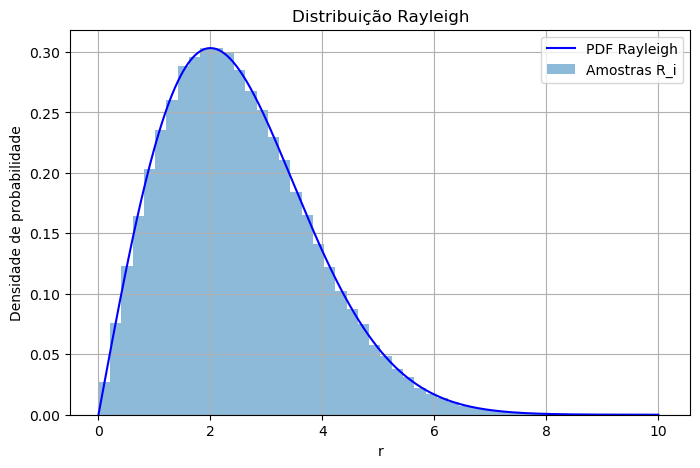

In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 200000        # número de amostras
sigma = 2.0         # parâmetro da FDP Rayleigh

# Geração de amostras de desvanecimento Rayleigh e  fase Uniforme
R = np.random.rayleigh(scale=sigma, size=N)
Theta = np.random.uniform(low=0, high=2*np.pi, size=N)

# Componentes X_i e Y_i
X_i = R * np.cos(Theta)
Y_i = R * np.sin(Theta)

# Soma dos componentes
X = np.sum(X_i)
Y = np.sum(Y_i)

# ---------------------------------------
# Valor esperado, variância e covariância
#----------------------------------------

media_X = np.mean(X_i)
media_Y = np.mean(Y_i)

cov_XY = np.cov(X_i, Y_i)
var_X = cov_XY[0, 0]
var_Y = cov_XY[1, 1]
cov_XY = cov_XY[0, 1]




print(f"Média de X: {media_X:.4f}")
print(f"Média de Y: {media_Y:.4f}")
print(f"Variância de X: {var_X:.4f}")
print(f"Variância de Y: {var_Y:.4f}")
print(f"Covariância entre X e Y: {cov_XY:.4f}")

#-----------------------------------------------
# Densidade de probabilidade Rayleigh
#-----------------------------------------------
r_vals = np.linspace(0, 5*sigma, 500)
pdf_rayleigh = (r_vals / sigma**2) * np.exp(-r_vals**2 / (2*sigma**2))

plt.figure(figsize=(8,5))
plt.plot(r_vals, pdf_rayleigh, label="PDF Rayleigh", color='blue')
plt.hist(R, bins=50, density=True, alpha=0.5, label="Amostras R_i")
plt.xlabel("r")
plt.ylabel("Densidade de probabilidade")
plt.title("Distribuição Rayleigh")
plt.legend()
plt.grid(True)
plt.show()

Quando N é grande o suficiente, e não há parcelas dominantes, $X$ e $Y$ convergem para gaussianas, com FDP:

$$
f_{X,Y}(x, y) = \frac{1}{2\pi \sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

em que a variável de interesse é $R = \sqrt{X^2 + Y^2}$

Assim, podemos calcular a função de probabilidade acumulada:

$$
F_R(r) = Pr[R^2<r] = Pr[X^2 + Y^2 < r^2] = 1-e^{-\frac{r^2}{2\sigma^2}}
$$

e então, a função densidade de probabilidade:

$$
f_r(r) = \frac{r}{\sigma^2}e^{-\frac{r^2}{2\sigma^2}}
$$

A partir de uma sequÊncia de amostras: $r_1, r_2, ..., r_N $, pode-se estimar o parâmetro variância $\sigma^2$:

$$
\sigma^2 = \frac{1}{2N} \sum_{i = 1}^N r_i^2
$$

In [19]:
import numpy as np

# Medições r_i, i=1,2,...,N
r = np.random.rayleigh(scale=sigma, size=N)

# Estimativa de sigma^2
sigma2_est = np.mean(r**2) / 2
print(f"Estimativa de σ²: {sigma2_est:.4f}")

Estimativa de σ²: 3.9940


### Média, valor rms e  mediana

o valor esperado de $R$ será:

$$
\begin{align}
\mathbb{E}[R] 
  &= \int_0^\infty r f_R(r)\,\mathrm{d}r \\[6pt]
  &{=} \frac{\sqrt{2\pi}}{\sigma} 
     \int_0^\infty r^2 \frac{1}{\sqrt{2\pi\sigma}} 
     e^{-r^2/(2\sigma^2)} \, mathrm{d}r \\[6pt]
  &{=} \tfrac{1}{2}\frac{\sqrt{2\pi}}{\sigma} 
     \int_{-\infty}^\infty r^2 \frac{1}{\sqrt{2\pi\sigma}} 
     e^{-r^2/(2\sigma^2)} \, mathrm{d}r \\[6pt]
  &{=} \sqrt{\tfrac{\pi}{2}}\,\sigma
\end{align}
$$

e o valor esperado do quadrado será:

$$
\mathbb{E}[R^2] = \mathbb{E}[X^2 + Y^2] = 2\sigma^2
$$

A mediana é por definição:

$$
P_r[R \leq r_{med}] = 0.5
$$

Assim, 

$$
r_{med} = \sqrt{2 \mathrm{ln} 2\sigma}
$$

A potência média do sinal recebido $r(t)$ é uma variável aleatória definida por:

$$
\begin{align}
W &= \lim_{T \to \infty} \frac{1}{T} 
     \int_{-\frac{T}{2}}^{\frac{T}{2}} 
     R^2 \cos^2\!\left( 2\pi f_c t + \Theta \right) \, \mathrm{d}t \\[6pt]
  &= \lim_{T \to \infty} \frac{1}{T} 
     \int_{-\frac{T}{2}}^{\frac{T}{2}} 
     \frac{R^2}{2} \left[ 1 + \cos\!\left( 4\pi f_c t + 2\Theta \right) \right] 
     \, \mathrm{d}t \\[6pt]
  &= \frac{R^2}{2}
\end{align}
$$

A potência média é dada por $\mathbb{E}[W] = \sigma^2$, e a mediana da potência é dada por: $\mathrm{P_r}[W<W_{med} = 1/2] \therefore W_{med} = \sigma^2 \mathrm{ln}2$.

A densidade de probabilidade de $W$ pode ser obtida pela transformação de variáveis:

$$
f_W(w) = f_R(r) \left| \frac{dr}{dw} \right|_{r=\sqrt{2w}}
$$

Como:

$$
\frac{dW}{dr} = r \quad \Rightarrow \quad \frac{dr}{dw} = \frac{1}{r}
$$

temos:

$$
f_W(w) = \left. \frac{r}{\sigma^2} e^{-r^2/(2\sigma^2)} \cdot \frac{1}{r} \right|_{r=\sqrt{2w}}
$$

$$
f_W(w) = \frac{1}{\sigma^2} e^{-w/\sigma^2}, \quad w \geq 0
$$

Portanto, $W$ segue uma **distribuição exponencial** com parâmetro $\lambda = 1/\sigma^2$.





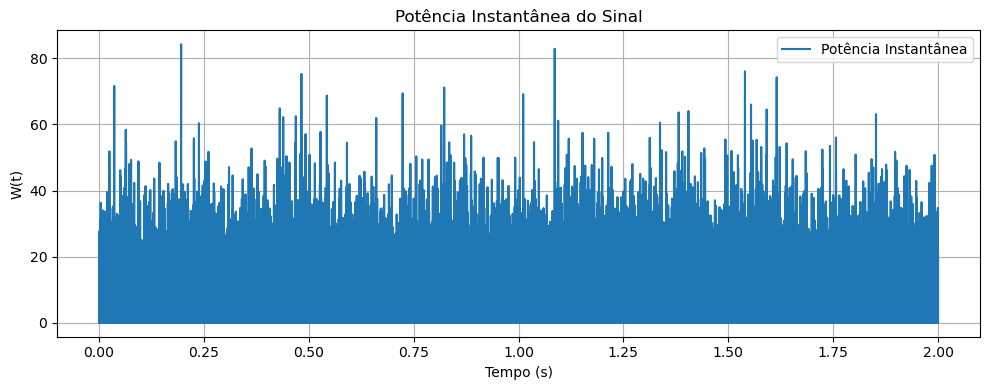

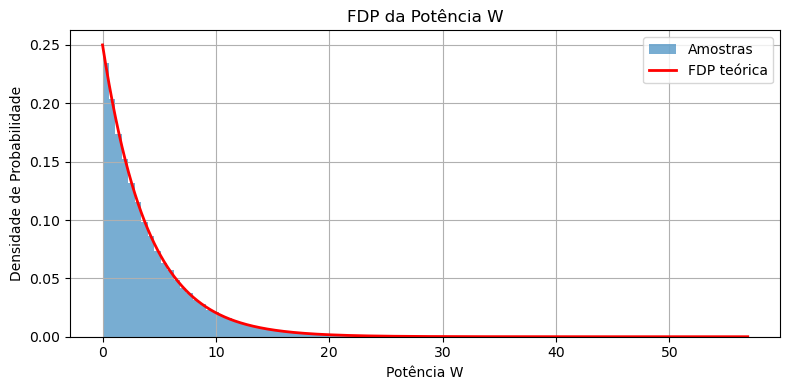

Potência média E[W]: 3.9897
Potência média teórica E[W]: 4.0000


Mediana de R (Rayleigh): 2.3548
Mediana simulada do modelo Rayleigh: 2.3506


Mediana da Potência W: 2.7726
Mediana simulada da Potência W: 2.7632


In [25]:
#-----------------------------------------------
# Potência instantânia, mediana e FDP da potência
#-----------------------------------------------

# Parâmetros
fc = 1.0  # Hz
T_total = 2.0
t = np.linspace(0, T_total, N)


# Potência instantânea W(t) = R^2 * cos^2(2π f_c t + Θ)
W_t = R**2 * np.cos(2*np.pi*fc*t + Theta)**2

# --- Plot da potência instantânea ---
plt.figure(figsize=(10,4))
plt.plot(t, W_t, label='Potência Instantânea')
plt.xlabel('Tempo (s)')
plt.ylabel('W(t)')
plt.title('Potência Instantânea do Sinal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Distribuição da potência ---
# W segue distribuição exponencial com lambda = 1/sigma^2
lambda_exp = 1 / sigma**2
W_samples = np.random.exponential(scale=1/lambda_exp, size=100000)

# Histograma + curva teórica
plt.figure(figsize=(8,4))
plt.hist(W_samples, bins=100, density=True, alpha=0.6, label='Amostras')
x = np.linspace(0, np.max(W_samples), 1000)
plt.plot(x, lambda_exp * np.exp(-lambda_exp * x), 'r-', lw=2, label='FDP teórica')
plt.xlabel('Potência W')
plt.ylabel('Densidade de Probabilidade')
plt.title('FDP da Potência W')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# --- Potência média --- 
print(f"Potência média E[W]: {np.mean(W_t):.4f}")
print(f"Potência média teórica E[W]: {sigma**2:.4f}")

# --- Medianas ---
r_med = np.sqrt(2 * np.log(2)) * sigma
W_med = sigma**2 * np.log(2)
print("\n")
print(f"Mediana de R (Rayleigh): {r_med:.4f}")
print(f"Mediana simulada do modelo Rayleigh: {np.median(r):.4f}")
print("\n")
print(f"Mediana da Potência W: {W_med:.4f}")
print(f"Mediana simulada da Potência W: {np.median(W_samples):.4f}")